### 📥 Carga y conversión de imágenes

Se cargaron dos imágenes usando OpenCV: una fotografía de un integrante del grupo y otra de un gato con alto contraste.  
OpenCV carga imágenes en formato BGR, por lo que se convirtieron a RGB para su correcta visualización y manipulación.


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#Abrir imagenes
img_cat = cv2.imread("cat_test.jpg")
img_sergio = cv2.imread("Sergio_Bohada.jpeg")

#Convertirla a RGGB
imagen_rgb_cat = cv2.cvtColor(img_cat, cv2.COLOR_BGR2RGB)
imagen_rgb_sergio = cv2.cvtColor(img_sergio, cv2.COLOR_BGR2RGB)



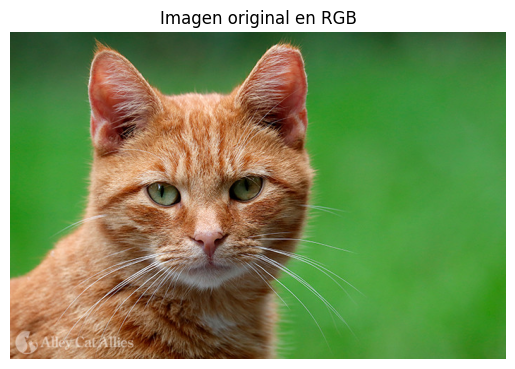

In [2]:
# Mostrar con matplotlib
plt.imshow(imagen_rgb_cat)
plt.title("Imagen original en RGB")
plt.axis("off")  # Ocultar ejes
plt.show()

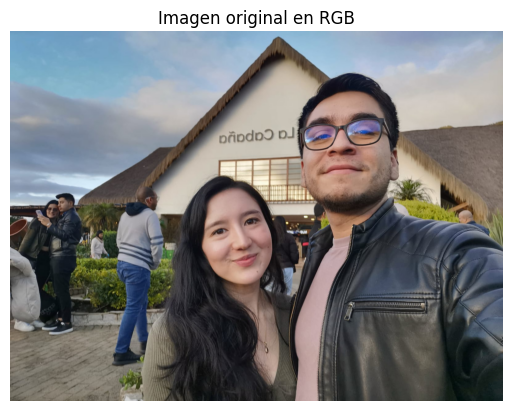

In [3]:
# Mostrar con matplotlib
plt.imshow(imagen_rgb_sergio)
plt.title("Imagen original en RGB")
plt.axis("off")  # Ocultar ejes
plt.show()

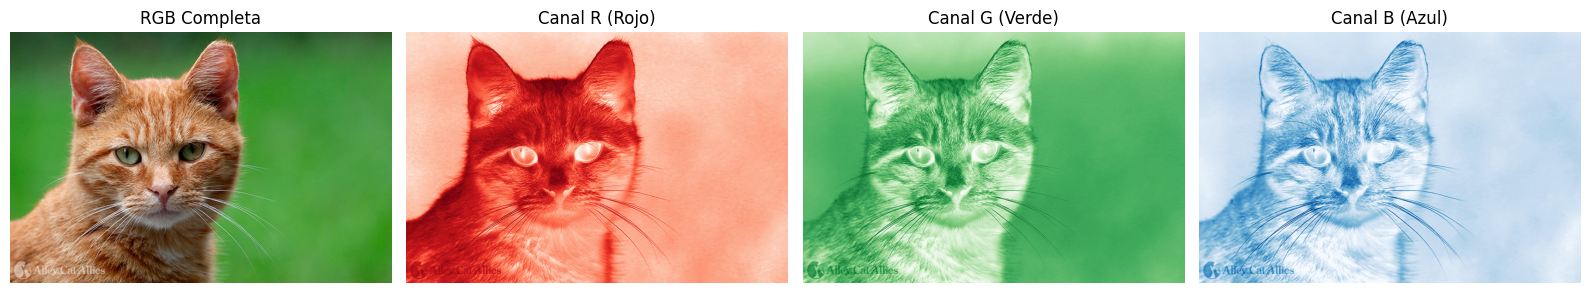

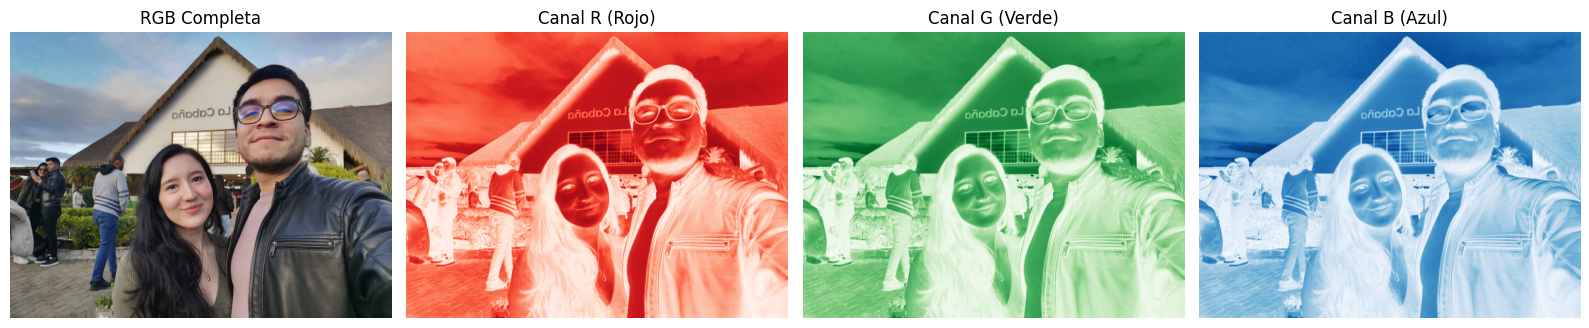

Canal R (Rojo):
[[ 34  32  31 ...  40  43  45]
 [ 27  27  27 ...  42  42  43]
 [ 28  29  29 ...  43  43  41]
 ...
 [122 116 115 ...  72  69  68]
 [139 139 142 ...  70  70  68]
 [158 159 166 ...  70  69  69]]
Canal G (Verde):
[[ 69  69  68 ...  90  91  93]
 [ 66  66  66 ...  92  92  93]
 [ 67  68  68 ...  93  93  94]
 ...
 [ 53  48  50 ... 138 138 139]
 [ 75  75  82 ... 136 136 137]
 [100 103 110 ... 134 135 135]]
Canal B (Azul):
[[39 38 37 ... 39 41 43]
 [35 35 35 ... 41 41 42]
 [36 37 37 ... 42 42 42]
 ...
 [14  9 12 ... 50 47 47]
 [37 37 45 ... 48 48 48]
 [62 66 73 ... 48 48 48]]


In [4]:
#Función auxiliar para mostrar la imagen
def show_layers(img):
    R, G, B = cv2.split(img)

    # 4. Mostrar cada canal
    fig, axs = plt.subplots(1, 4, figsize=(16, 4))

    axs[0].imshow(img)
    axs[0].set_title("RGB Completa")
    axs[0].axis("off")

    axs[1].imshow(R, cmap="Reds")
    axs[1].set_title("Canal R (Rojo)")
    axs[1].axis("off")

    axs[2].imshow(G, cmap="Greens")
    axs[2].set_title("Canal G (Verde)")
    axs[2].axis("off")

    axs[3].imshow(B, cmap="Blues")
    axs[3].set_title("Canal B (Azul)")
    axs[3].axis("off")

    plt.tight_layout()
    plt.show()
    
    return R, G, B

layers_cat = show_layers(imagen_rgb_cat)
layers_sergio = show_layers(imagen_rgb_sergio)

print("Canal R (Rojo):")
print(layers_cat[0])
print("Canal G (Verde):")
print(layers_cat[1])
print("Canal B (Azul):")
print(layers_cat[2])

### 🧩 Aplicación del filtro de repujado

Se definió una función personalizada para aplicar el filtro de repujado sobre cada uno de los canales RGB de la imagen.  
El filtro se implementó a través de una convolución manual, recorriendo cada píxel (exceptuando los bordes) y aplicando un kernel de 3x3 que realza contornos y genera un efecto de relieve.

Cada canal se procesó por separado, y el valor resultante de la convolución se ajustó sumando 128 para centrar los valores en el nivel medio (gris neutro), seguido de una normalización al rango [0, 255] para mantener la integridad visual.  
Finalmente, se devolvieron los tres canales procesados, listos para ser combinados en la imagen final repujada.


In [5]:
def aplicar_filtro_repujado(R, G, B):
    # Definimos el kernel de repujado
    kernel = np.array([
        [-2, -1, 0],
        [-1,  1, 1],
        [ 0,  1, 2]
    ])

    def convolucion_manual(canal):
        alto, ancho = canal.shape
        print("Alto:", alto)
        print("Ancho:", ancho) 
        salida = np.zeros((alto - 2, ancho - 2), dtype=np.float32)  # evitamos bordes
        for i in range(1, alto - 1):
            for j in range(1, ancho - 1):
                region = canal[i - 1:i + 2, j - 1:j + 2]
                valor = np.sum(region * kernel)
                salida[i - 1, j - 1] = valor
        # Escalar y ajustar al rango 0-255
        salida = np.clip(salida + 128, 0, 255).astype(np.uint8)
        return salida

    # Aplicar a cada canal
    R_embossed = convolucion_manual(R)
    G_embossed = convolucion_manual(G)
    B_embossed = convolucion_manual(B)

    return R_embossed, G_embossed, B_embossed


In [6]:
# Tomamos un fragmento de la capa roja para mostrar
print("🔴 Antes (R - fragmento):")
print(layers_cat[0])

# Aplicamos el filtro
R_emb, G_emb, B_emb = aplicar_filtro_repujado(*layers_cat)
R_emb_S, G_emb_S, B_emb_S = aplicar_filtro_repujado(*layers_sergio)

print("\n🔴 Después (R - fragmento):")
print(R_emb)  # Mostrar la capa roja completa

# Combinar canales repujados en una imagen RGB
img_repujado_cat = cv2.merge((R_emb, G_emb, B_emb))
img_repujado_sergio = cv2.merge((R_emb_S, G_emb_S, B_emb_S))



🔴 Antes (R - fragmento):
[[ 34  32  31 ...  40  43  45]
 [ 27  27  27 ...  42  42  43]
 [ 28  29  29 ...  43  43  41]
 ...
 [122 116 115 ...  72  69  68]
 [139 139 142 ...  70  70  68]
 [158 159 166 ...  70  69  69]]
Alto: 463
Ancho: 703
Alto: 463
Ancho: 703
Alto: 463
Ancho: 703
Alto: 1200
Ancho: 1600
Alto: 1200
Ancho: 1600
Alto: 1200
Ancho: 1600

🔴 Después (R - fragmento):
[[142 148 154 ... 180 180 173]
 [178 178 175 ... 179 171 166]
 [187 187 185 ... 170 163 164]
 ...
 [199 255 255 ... 191 182 179]
 [255 255 255 ... 193 189 187]
 [255 255 255 ... 197 190 190]]


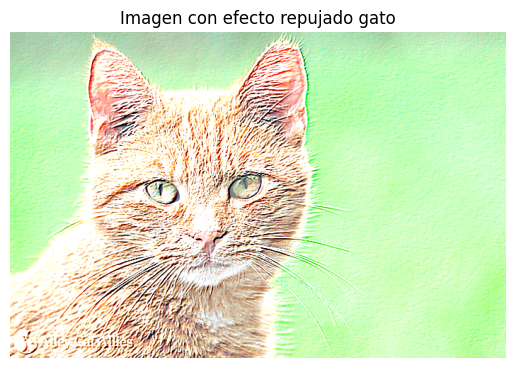

In [7]:
plt.imshow(img_repujado_cat)
plt.title("Imagen con efecto repujado gato")
plt.axis("off")
plt.show()

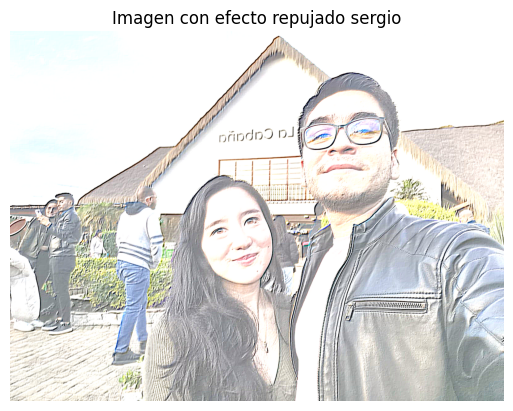

In [8]:
plt.imshow(img_repujado_sergio)
plt.title("Imagen con efecto repujado sergio")
plt.axis("off")
plt.show()